In [14]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier

import warnings
warnings.filterwarnings("ignore")

### Random Noise

#### make_classification()
Rastgele bir n-sınıflı veri seti oluşturmak için kullanılan fonksiyondur. 
* n_samples veri setinin içerdiği veri sayısını belirlemek için kullanılır
* n_features veri setinde bulunan veriler için ne kadar özellik bulunması gerektiğini belirlemek için kullanılır.
    * n_informative bilgilendirici özelliklerin sayısıdır
    * n_redundant yedekli özelliklerin sayısıdır. Bu özellikler bilgilendirici özelliklerin rastgele doğrusal kombinasyonları olarak üretilir.
    * n_repeated bilgilendirici ve yedekli özelliklerden alınan yinelenen özellik sayısıdır
* n_classes sınıf/etiket sayısıdır.
* n_clusters_per_class sınıf başına küme sayısıdır.
* flip_y sınıfı rastgele atanan verilerin oranıdır. Büyük değerlerde olduğunda etiketlerdeki gürültü artar ve bu sebeple sınıflandırma zorlaşabilir.

In [15]:
# Create Dataset
n_samples= 1000
n_features= 2
n_classes= 2
random_state= 42
noise_class= 0.2
X,y= make_classification(n_samples= n_samples,
                   n_features= n_features,
                   n_classes=n_classes,
                   n_repeated= 0,
                   n_redundant= 0,
                   n_informative= n_features-1,
                   random_state= random_state,
                   n_clusters_per_class= 1,
                   flip_y= noise_class)

<AxesSubplot:xlabel='0', ylabel='1'>

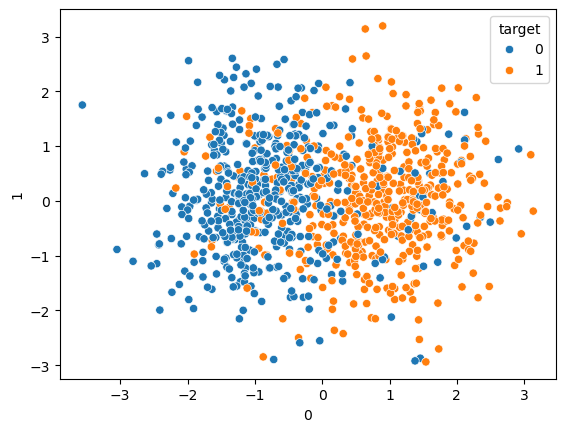

In [16]:
data= pd.DataFrame(X)
data["target"]=y
plt.figure()
sns.scatterplot(x= data.iloc[:,0], y= data.iloc[:,1], hue="target", data=data)

In [17]:
data_classification= (X,y)

### Moon Noise Dataset

Sınıflandırma algoritmalarını daha iyi görselleştirebilmek için birbirine geçen iki hilal şeklinde veri seti oluşturmayı sağlar.

In [18]:
noise_moon= 0.1
moon= make_moons(n_samples= n_samples, noise= noise_moon, random_state= random_state)

<AxesSubplot:xlabel='0', ylabel='1'>

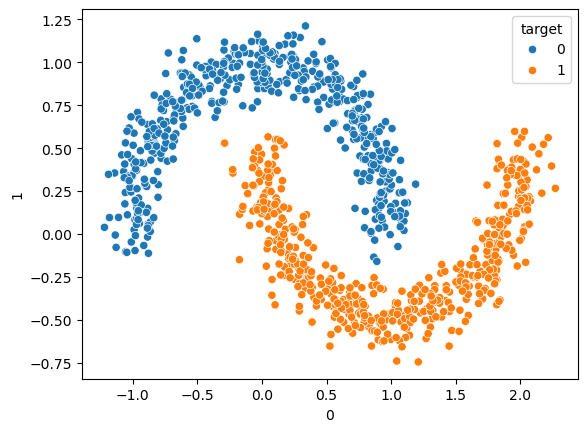

In [19]:
data= pd.DataFrame(moon[0])
data["target"]=moon[1]
plt.figure()
sns.scatterplot(x= data.iloc[:,0], y= data.iloc[:,1], hue="target", data=data)

### Circle Noise Dataset

2 Boyutlu gösterimlerde büyük bir dairenin içerisinde küçük bir daire şeklinde veri seti oluşturur.

In [20]:
noise_circle= 0.1
circle= make_circles(n_samples= n_samples, noise= noise_circle,factor= 0.1, random_state= random_state)

<AxesSubplot:xlabel='0', ylabel='1'>

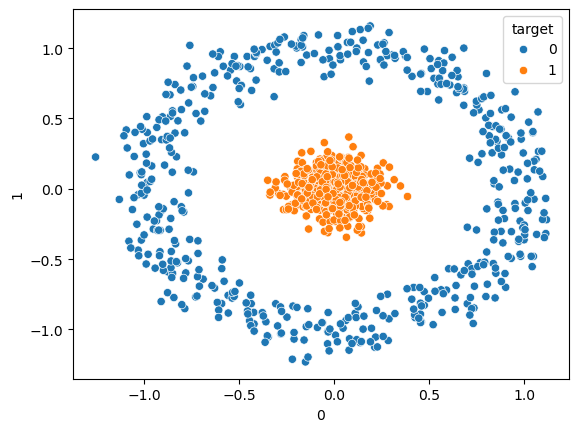

In [21]:
data= pd.DataFrame(circle[0])
data["target"]=circle[1]
plt.figure()
sns.scatterplot(x= data.iloc[:,0], y= data.iloc[:,1], hue="target", data=data)

In [22]:
datasets= [moon,circle]

### KNN, SVC and Decision Tree Classifiers

In [23]:
svc= SVC()
knn= KNeighborsClassifier(n_neighbors=15)
dt= DecisionTreeClassifier(random_state= random_state)

names= ["SVC","KNN","Decision Tree"]
classifiers= [svc, knn, dt]

### Train

Dataset # 0
SVC: test set score: 1.0
SVC: train set score: 0.9966666666666667

KNN: test set score: 1.0
KNN: train set score: 1.0

Decision Tree: test set score: 1.0
Decision Tree: train set score: 1.0

--------------------------------------------------
Dataset # 1
SVC: test set score: 1.0
SVC: train set score: 1.0

KNN: test set score: 1.0
KNN: train set score: 1.0

Decision Tree: test set score: 1.0
Decision Tree: train set score: 1.0

--------------------------------------------------


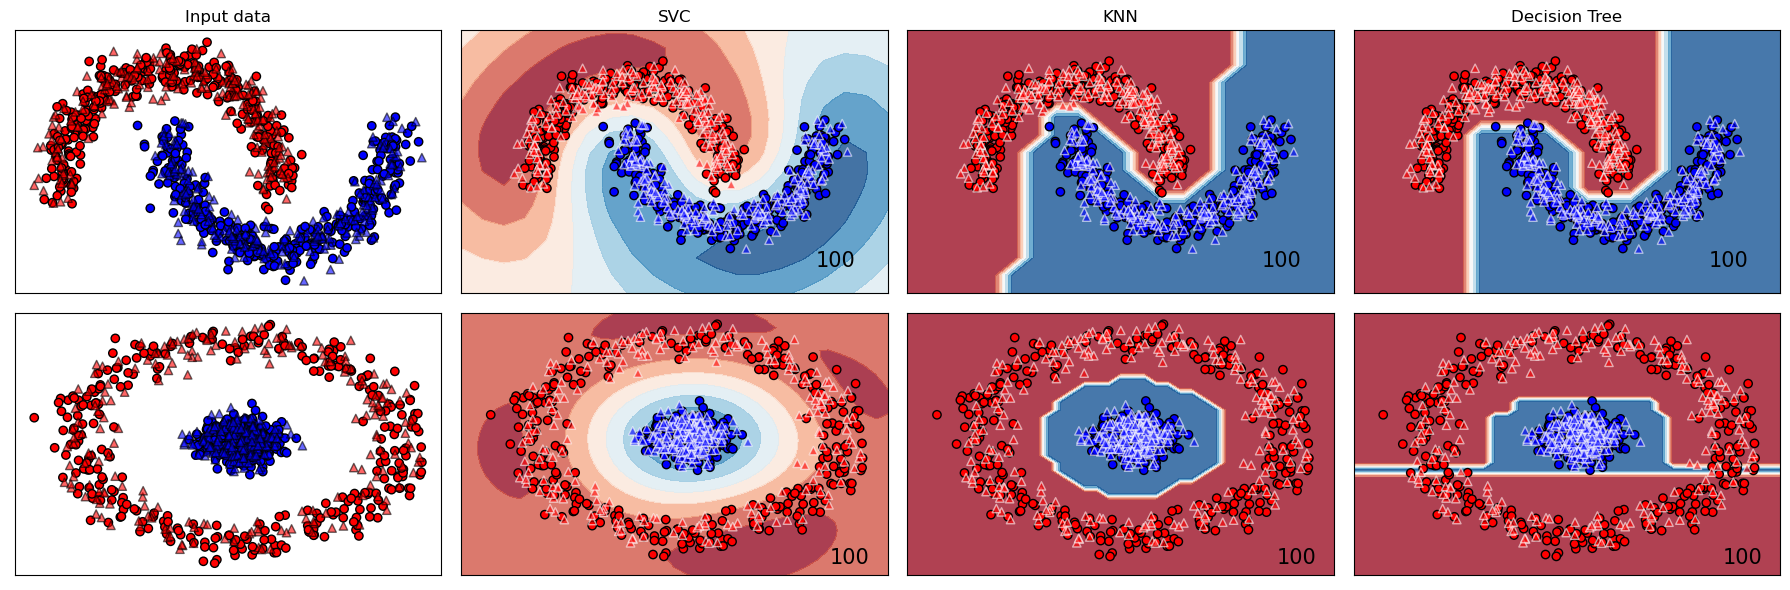

In [24]:
h= 0.2
i= 1

figure= plt.figure(figsize=(18,6))
for ds_cnt, ds in enumerate(datasets):
    X,y = ds
    X= RobustScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state= random_state)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max()+ .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max()+ .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax= plt.subplot(len(datasets), len(classifiers)+1, i) # i index
    
    if ds_cnt == 0: 
        ax.set_title("Input data")  # counter 0 ise input modele verilmiştir.
    
    # train-test plot
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap= cm_bright, edgecolors='k')
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap= cm_bright, alpha= 0.6, marker= '^', edgecolors='k')
    
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    print("Dataset # {}". format(ds_cnt))
    
    for name, clf in zip(names, classifiers):
        ax= plt.subplot(len(datasets), len(classifiers)+1, i)
        clf.fit(X_train, y_train)
        score= clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train = clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()
        
        if hasattr(clf, "decision_function"):
            Z= clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z= clf.predict(np.c_[xx.ravel(), yy.ravel()])
            
        # Put the result into a color plot    
        Z= Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap= cm, alpha=.8)
        
        # Plot the training points
        ax.scatter(X_train[:,0], X_train[:,1], c= y_train, cmap= cm_bright,
                  edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, marker='^',
                  edgecolors= 'white', alpha=0.6)
        
        ax.set_xticks(())
        ax.set_yticks(())
        
        if ds_cnt == 0:
            ax.set_title(name)
        score = score*100
        ax.text(xx.max() - .3, yy.min() + .3, ('%1.f'%score),
               size=15, horizontalalignment='right')
        i +=1
        
    print('--------------------------------------------------')
    
plt.tight_layout()
plt.show()

In [25]:
def make_classify(dc, clf, name):
    x, y = dc
    x = RobustScaler().fit_transform(x)  # standardization
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.4, random_state= random_state)
    
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        score= clf.score(X_test, y_test)
        print("{}: test set score: {}".format(name, score))
        score_train= clf.score(X_train, y_train)
        print("{}: train set score: {}".format(name, score_train))
        print()

In [26]:
print("Dataset # 2")
make_classify(data_classification, classifiers, names)

Dataset # 2
SVC: test set score: 0.825
SVC: train set score: 0.84

KNN: test set score: 0.8175
KNN: train set score: 0.8416666666666667

Decision Tree: test set score: 0.73
Decision Tree: train set score: 1.0

